In [1]:
import matplotlib.pyplot as plt

import numpy as np

from experiments.evaluation_flow.shared import MODELS
from experiments.plots.util import parse_all_log_files, filter_by_attribute, calc_save_times, all_files_in_dir, \
    use_case_ids, id_use_case_dict, calc_recover_times

In [2]:
ROOT_LOG_DIR = '/Users/nils/Downloads/log-dir'


In [3]:

all_files_parsed = parse_all_log_files(ROOT_LOG_DIR)
baseline_only = filter_by_attribute(all_files_parsed, ('approach', 'baseline'))
baseline_versions = filter_by_attribute(baseline_only, ('snapshot_type', 'version'))
baseline_version_food = filter_by_attribute(baseline_versions, ('snapshot_dist', 'food'))

baseline_version_food_server = filter_by_attribute(baseline_version_food, ('location', 'server'))
baseline_version_food_server_0 = filter_by_attribute(baseline_version_food_server, ('run', '0'))

baseline_version_food_node = filter_by_attribute(baseline_version_food, ('location', 'node'))
baseline_version_food_node_0 = filter_by_attribute(baseline_version_food_node, ('run', '0'))

In [4]:
save_times = calc_save_times(baseline_version_food_server_0, baseline_version_food_node_0)
print(save_times)

{'resnet152': {'U_1': 2.884218203, 'U_2': 2.97563805, 'U_3_1_1': 2.73320811, 'U_3_1_2': 2.874668105, 'U_3_1_3': 2.906728698, 'U_3_1_4': 3.018493345, 'U_3_2_1': 3.143466162, 'U_3_2_2': 3.1924417540000003, 'U_3_2_3': 3.2854101470000003, 'U_3_2_4': 3.314493649}, 'mobilenet': {'U_1': 1.670808695, 'U_2': 1.7127418980000002, 'U_3_1_1': 1.6966172080000002, 'U_3_1_2': 1.703454924, 'U_3_1_3': 1.717453981, 'U_3_1_4': 1.7164160460000002, 'U_3_2_1': 1.7230210490000002, 'U_3_2_2': 1.7478758380000001, 'U_3_2_3': 1.7633548570000002, 'U_3_2_4': 1.762523716}, 'resnet50': {'U_1': 2.079562304, 'U_2': 2.1055126630000003, 'U_3_1_1': 2.0985620330000003, 'U_3_1_2': 2.1470785980000002, 'U_3_1_3': 2.187090104, 'U_3_1_4': 2.285064971, 'U_3_2_1': 2.33521897, 'U_3_2_2': 2.354611825, 'U_3_2_3': 2.389312127, 'U_3_2_4': 2.505424441}, 'googlenet': {'U_1': 1.820960919, 'U_2': 1.854520578, 'U_3_1_1': 1.8142075910000002, 'U_3_1_2': 1.8208129130000001, 'U_3_1_3': 1.8502121740000002, 'U_3_1_4': 1.9119142880000002, 'U_3_2_

In [5]:
def rearrange_u2(use_cases):
    use_cases.sort()
    # remove U_2
    u2 = use_cases.pop(1)
    num_cases = len(use_cases)
    new_u2_pos = int((num_cases - 1) / 2) + 1
    use_cases.insert(new_u2_pos, u2)
    return use_cases


def plot_save_time_one_model(save_times, save_path=None):
    # TODO include U1 as soon as be have the new results
    use_cases = rearrange_u2(list(save_times.keys()))

    plt.rc('font', size=12)
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    times = [save_times[k] for k in use_cases]
    ax.bar(use_cases, times)
    ax.set_ylabel('Save time in seconds')
    ax.set_xlabel('Use case description')
    plt.xticks(rotation=45)
    if save_path:
        fig.savefig(save_path, bbox_inches='tight')

    plt.show()

    print(use_cases)

In [6]:
def plot_recover_time_one_model(save_times, save_path=None):
    use_cases = rearrange_u2(list(save_times.keys()))

    plt.rc('font', size=12)
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    times = [save_times[k] for k in use_cases]
    ax.bar(use_cases, times)
    ax.set_ylabel('Recover time in seconds')
    ax.set_xlabel('Use case description')
    plt.xticks(rotation=45)
    if save_path:
        fig.savefig(save_path, bbox_inches='tight')

    plt.show()


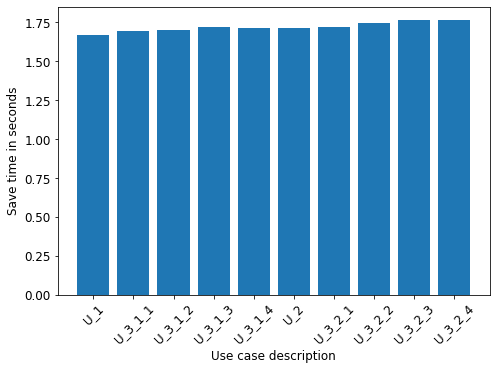

['U_1', 'U_3_1_1', 'U_3_1_2', 'U_3_1_3', 'U_3_1_4', 'U_2', 'U_3_2_1', 'U_3_2_2', 'U_3_2_3', 'U_3_2_4']


In [7]:
plot_save_time_one_model(save_times['mobilenet'], './pdfs/mobilenet.pdf')

In [8]:
# plot_save_time_one_model(save_times['googlenet'])
#

In [9]:
# plot_save_time_one_model(save_times['resnet18'])
#

In [10]:
# plot_save_time_one_model(save_times['resnet50'])
#

In [11]:
# plot_save_time_one_model(save_times['resnet152'])

In [12]:
all_files = all_files_in_dir(ROOT_LOG_DIR)
id_to_use_case= [id_use_case_dict(log_file) for log_file in all_files]
id_use_case_mapping = {}
for d in id_to_use_case:
    id_use_case_mapping.update(d)
print(id_use_case_mapping)


{'60c7988deaa01d02055de55e': 'U_1', '60c7989380c547bd7f0e3d27': 'U_3_1_1', '60c7989580c547bd7f0e3d29': 'U_3_1_2', '60c7989780c547bd7f0e3d2b': 'U_3_1_3', '60c7989a80c547bd7f0e3d2d': 'U_3_1_4', '60c7989ceaa01d02055de561': 'U_2', '60c798a180c547bd7f0e3d2f': 'U_3_2_1', '60c798a480c547bd7f0e3d31': 'U_3_2_2', '60c798a680c547bd7f0e3d33': 'U_3_2_3', '60c798a980c547bd7f0e3d35': 'U_3_2_4', '60c79c82ab0f495892490e42': 'U_1', '60c79c8957f5e2fe2eeb1326': 'U_3_1_1', '60c79c8d57f5e2fe2eeb1328': 'U_3_1_2', '60c79c9257f5e2fe2eeb132a': 'U_3_1_3', '60c79c9657f5e2fe2eeb132c': 'U_3_1_4', '60c79c9aab0f495892490e45': 'U_2', '60c79ca157f5e2fe2eeb132e': 'U_3_2_1', '60c79ca657f5e2fe2eeb1330': 'U_3_2_2', '60c79cab57f5e2fe2eeb1332': 'U_3_2_3', '60c79cb057f5e2fe2eeb1334': 'U_3_2_4', '60c793a633490ef19216edbe': 'U_1', '60c793aa867c5a39da297614': 'U_3_1_1', '60c793ab867c5a39da297616': 'U_3_1_2', '60c793ad867c5a39da297618': 'U_3_1_3', '60c793af867c5a39da29761a': 'U_3_1_4', '60c793b133490ef19216edc1': 'U_2', '60c793b5

In [13]:
rec_times = calc_recover_times(baseline_version_food_server_0)
print(rec_times)

{'resnet152': {'U_1': 3.898194693, 'U_3_1_1': 3.858245439, 'U_3_1_2': 4.067692296000001, 'U_3_1_3': 3.8347784280000003, 'U_3_1_4': 3.845494931, 'U_2': 3.945320676, 'U_3_2_1': 3.858978661, 'U_3_2_2': 3.8470084300000003, 'U_3_2_3': 3.8249284660000002, 'U_3_2_4': 3.8674146}, 'mobilenet': {'U_1': 1.808538959, 'U_3_1_1': 1.795615661, 'U_3_1_2': 1.8082256870000002, 'U_3_1_3': 1.785332214, 'U_3_1_4': 1.8151715990000001, 'U_2': 1.740166144, 'U_3_2_1': 1.842531901, 'U_3_2_2': 1.7847135820000002, 'U_3_2_3': 1.7828842660000002, 'U_3_2_4': 1.8003549010000002}, 'resnet50': {'U_1': 2.574156374, 'U_3_1_1': 2.5806511210000003, 'U_3_1_2': 2.571129373, 'U_3_1_3': 2.536301137, 'U_3_1_4': 2.599525625, 'U_2': 2.5345018080000004, 'U_3_2_1': 2.611151387, 'U_3_2_2': 2.621178697, 'U_3_2_3': 2.610859714, 'U_3_2_4': 2.567187342}, 'googlenet': {'U_1': 2.245621532, 'U_3_1_1': 2.269061782, 'U_3_1_2': 2.253832662, 'U_3_1_3': 2.2629547700000003, 'U_3_1_4': 2.27135837, 'U_2': 2.162166592, 'U_3_2_1': 2.236680739, 'U_3_

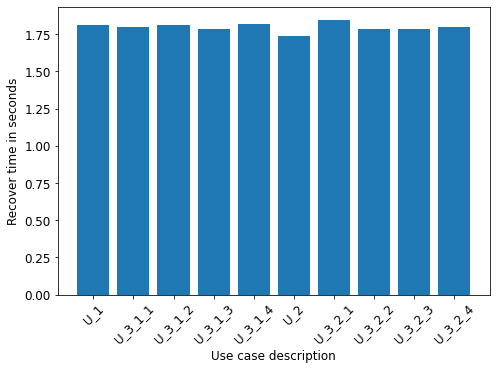

['U_1', 'U_3_1_1', 'U_3_1_2', 'U_3_1_3', 'U_3_1_4', 'U_2', 'U_3_2_1', 'U_3_2_2', 'U_3_2_3', 'U_3_2_4']


In [14]:
plot_recover_time_one_model(rec_times['mobilenet'])

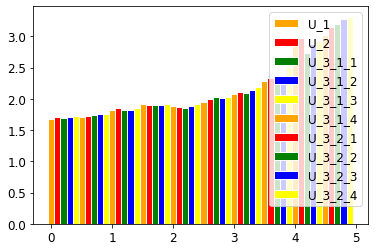

In [15]:

# set width of bars
barWidth = 0.1

bars = {}
for m in MODELS:
    times = save_times[m]
    for use_case, time in times.items():
        if use_case in bars:
            bars[use_case].append(time)
        else:
            bars[use_case] = [time]

# Set position of bar on X axis
# l = len(bars[U_1])
# print(l)
# positions = [np.arange(l)]
# for i in range(1, len(bars)):
#     prev_positions = positions[-1]
#     positions.append(prev_positions)

r1 = np.arange(5)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]
r10 = [x + barWidth for x in r9]
positions = [r1, r2, r3, r4, r5, r6, r7, r8, r9, r10]

colors = ['orange', 'red', 'green', 'blue', 'yellow', 'orange', 'red', 'green', 'blue', 'yellow']

for position, bar, color, label in zip(positions, list(bars.values())[:], colors, list(bars.keys())[:]):
    plt.bar(position, bar, color=color, width=barWidth, edgecolor='white', label=label)

# # Add xticks on the middle of the group bars
# plt.xlabel('group', fontweight='bold')
# plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])

# Create legend & Show graphic
plt.legend()
plt.show()

In [16]:
meta, events = baseline_version_food_server_0[0]
e_u1 = events[0]
e_u2 = events[5]
print(e_u1)
print(e_u2)



U_1: 2.8842182030s 
_save_full_model -- all: 0.9665351690s 
	_save_full_model -- pickle_weights: 0.3958756980s 
	_save_full_model -- _get_weights_hash_info: 0.3376685490s 
	_save_full_model -- persist_model_info: 0.2312848850s 
		persist -- schema_obj(model_info): 0.2310013790s 
			persist -- schema_obj(recover_info): 0.2141032750s 
				mmlib_file_pers -- save_file: 0.0111184090s 
				mmlib_file_pers -- save_file: 0.1953713400s 
				persist -- schema_obj(environment): 0.0053620660s 
					mmlib_dict_pers -- save_dict -- collection(environment): 0.0051576960s 
				mmlib_dict_pers -- save_dict -- collection(recover_info): 0.0020130820s 
			mmlib_dict_pers -- save_dict -- collection(model_info): 0.0138720360s 

U_2: 2.9756380500s 
_save_full_model -- all: 0.9676845530s 
	_save_full_model -- pickle_weights: 0.4156039900s 
	_save_full_model -- _get_weights_hash_info: 0.3246627070s 
	_save_full_model -- persist_model_info: 0.2262196590s 
		persist -- schema_obj(model_info): 0.2259506190s 
			

In [17]:
meta, events = extract_event_and_and_meta('/Users/nils/Downloads/test-env-log.txt')

NameError: name 'extract_event_and_and_meta' is not defined

In [ ]:
for e in events:
    print(e)